In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
data_string = "/content/cyber_attacks.csv"
data = pd.read_csv(data_string)
print(data.columns)

Index(['Country', 'Spam', 'Ransomware', 'Local Infection', 'Exploit',
       'Malicious Mail', 'Network Attack', 'On Demand Scan', 'Web Threat',
       'Rank Spam', 'Rank Ransomware', 'Rank Local Infection', 'Rank Exploit',
       'Rank Malicious Mail', 'Rank Network Attack', 'Rank On Demand Scan',
       'Rank Web Threat'],
      dtype='object')


In [ ]:
print(data.head())

                  Country     Spam  Ransomware  Local Infection  Exploit  \
0  Arab Republic of Egypt  0.00090     0.00013          0.01353  0.00013   
1      Argentine Republic  0.00601     0.00006          0.00575  0.00035   
2                   Aruba      NaN         NaN          0.01384      NaN   
3   Bailiwick of Guernsey      NaN         NaN          0.00546  0.00273   
4     Bailiwick of Jersey  0.00003         NaN          0.00774  0.00101   

   Malicious Mail  Network Attack  On Demand Scan  Web Threat  Rank Spam  \
0         0.00287         0.01007         0.01148     0.01708         68   
1         0.00058         0.00095         0.00482     0.00974         27   
2         0.00092             NaN         0.00830     0.00554        162   
3             NaN         0.00091         0.00546     0.01001        162   
4         0.00067             NaN         0.00707     0.01145        138   

   Rank Ransomware  Rank Local Infection  Rank Exploit  Rank Malicious Mail  \
0      

In [ ]:
print(data['Country'].value_counts())

Country
Arab Republic of Egypt                   392
Republic of Peru                         392
Republic of Indonesia                    392
Republic of Iraq                         392
Republic of Ireland                      392
                                        ... 
Virgin Islands of the United States        4
State of Eritrea                           3
Federated States of Micronesia             2
Antarctica                                 2
Democratic People's Republic of Korea      2
Name: count, Length: 225, dtype: int64


In [ ]:
dados_brasil = data[data['Country'] == 'Federative Republic of Brazil']
print(dados_brasil)

                             Country     Spam  Ransomware  Local Infection  \
29     Federative Republic of Brazil  0.01984     0.00011          0.01833   
226    Federative Republic of Brazil  0.01984     0.00011          0.01833   
424    Federative Republic of Brazil  0.00796     0.00012          0.01775   
619    Federative Republic of Brazil  0.01520     0.00006          0.00968   
818    Federative Republic of Brazil  0.01257     0.00017          0.01852   
...                              ...      ...         ...              ...   
76657  Federative Republic of Brazil  0.01029     0.00009          0.01840   
76855  Federative Republic of Brazil  0.01108     0.00007          0.01826   
77053  Federative Republic of Brazil  0.00826     0.00008          0.01783   
77250  Federative Republic of Brazil  0.03843     0.00007          0.01591   
77453  Federative Republic of Brazil  0.03188     0.00005          0.01011   

       Exploit  Malicious Mail  Network Attack  On Demand Scan 

In [ ]:
print(dados_brasil['Rank Spam'].value_counts())

Rank Spam
6     59
7     56
5     40
9     35
8     35
10    24
13    21
19    14
4     14
11    13
12    13
14    12
16    10
15    10
17     9
3      9
18     8
1      4
21     3
23     1
26     1
20     1
Name: count, dtype: int64


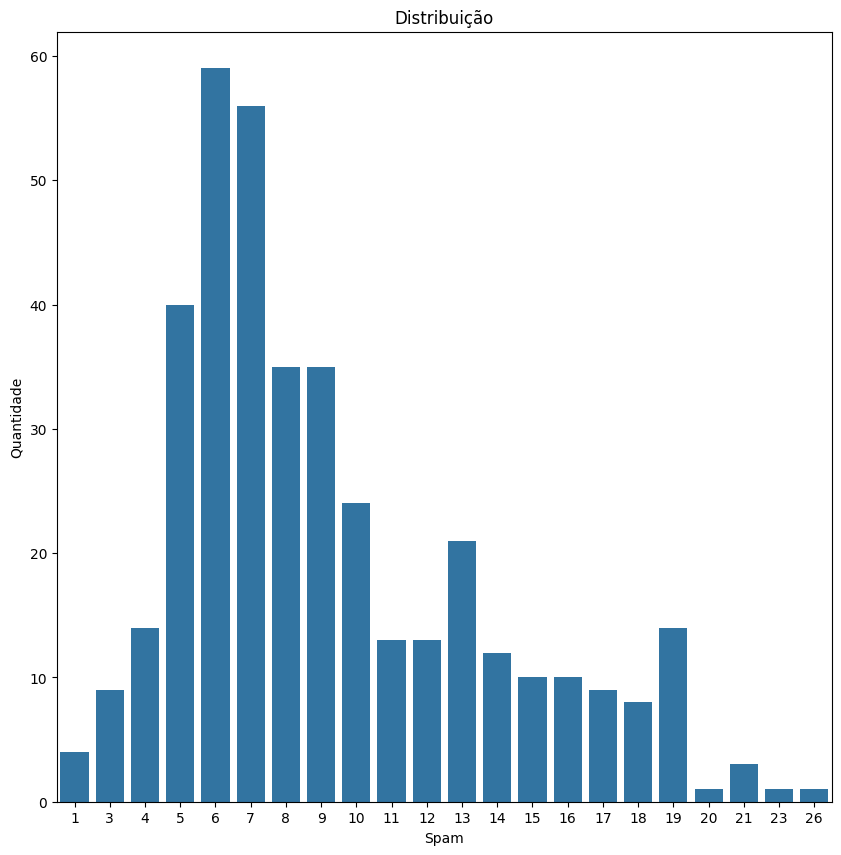

In [ ]:
plt.figure(figsize=(10, 10))  # Largura 16 polegadas, altura 6 polegadas
sns.countplot(x='Rank Spam', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Spam')
plt.ylabel('Quantidade')
plt.show()

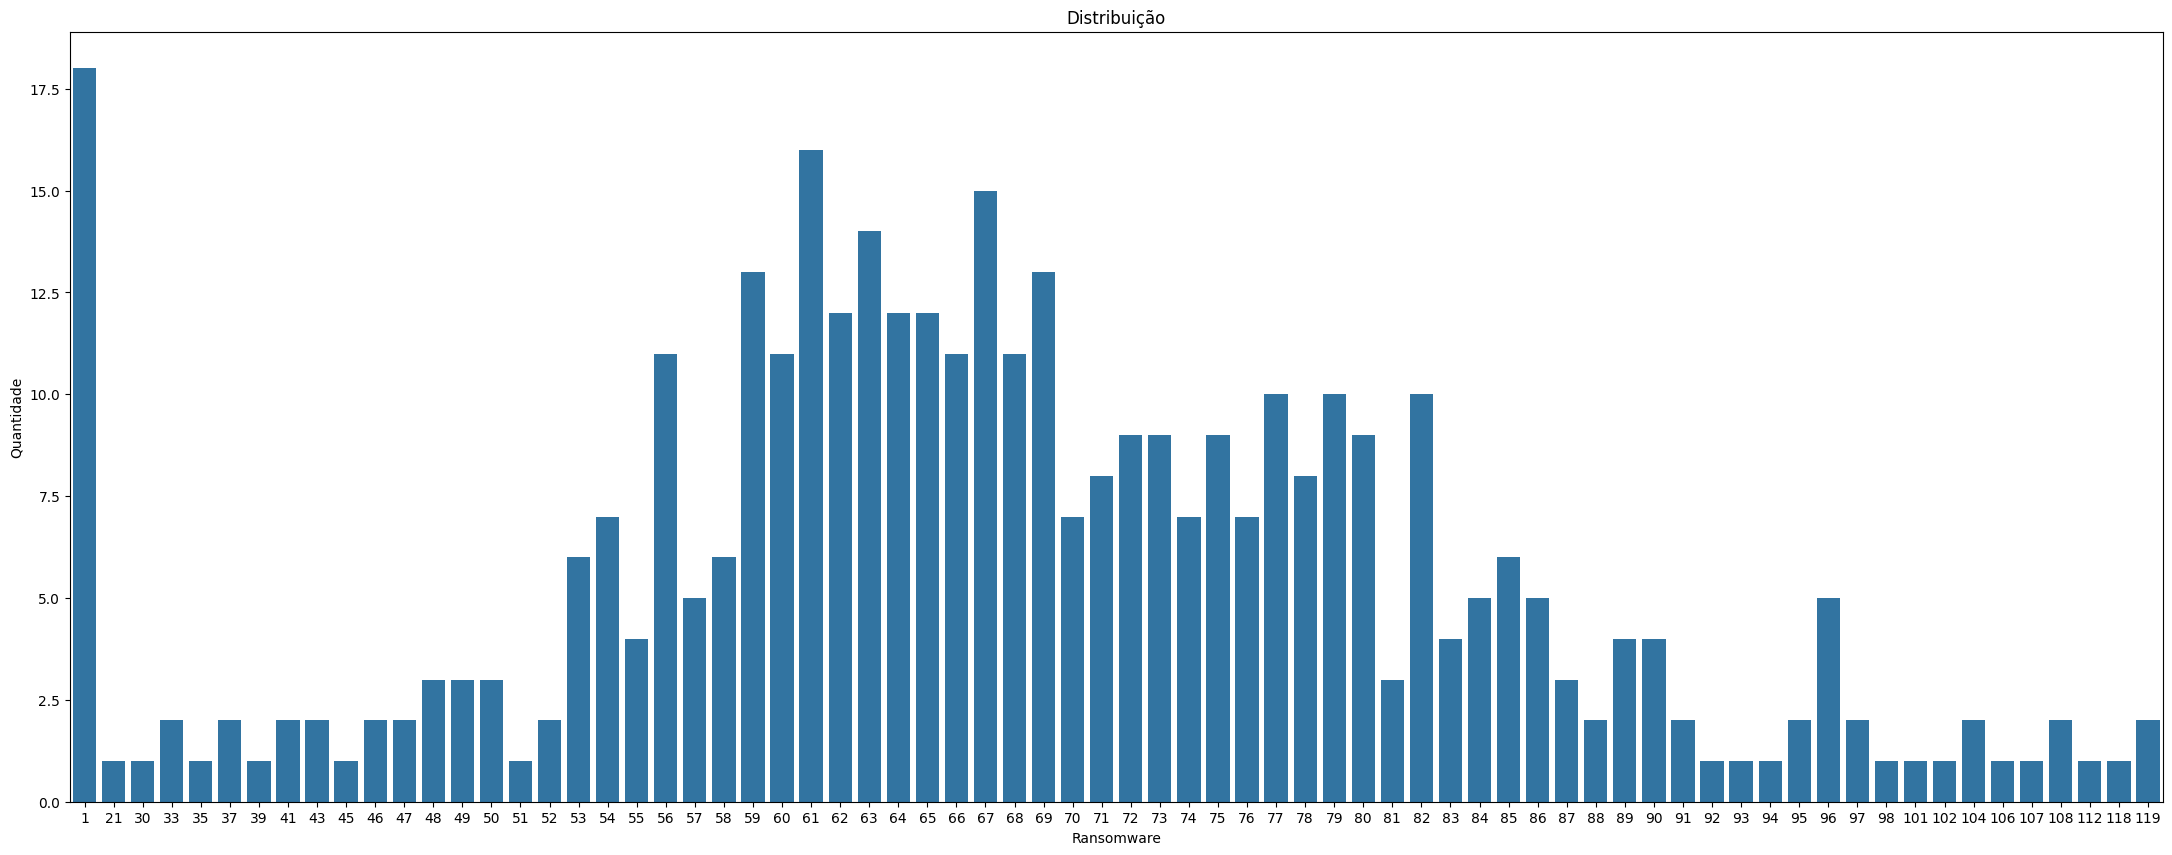

In [ ]:
plt.figure(figsize=(27, 10))
sns.countplot(x='Rank Ransomware', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Ransomware')
plt.ylabel('Quantidade')
plt.show()

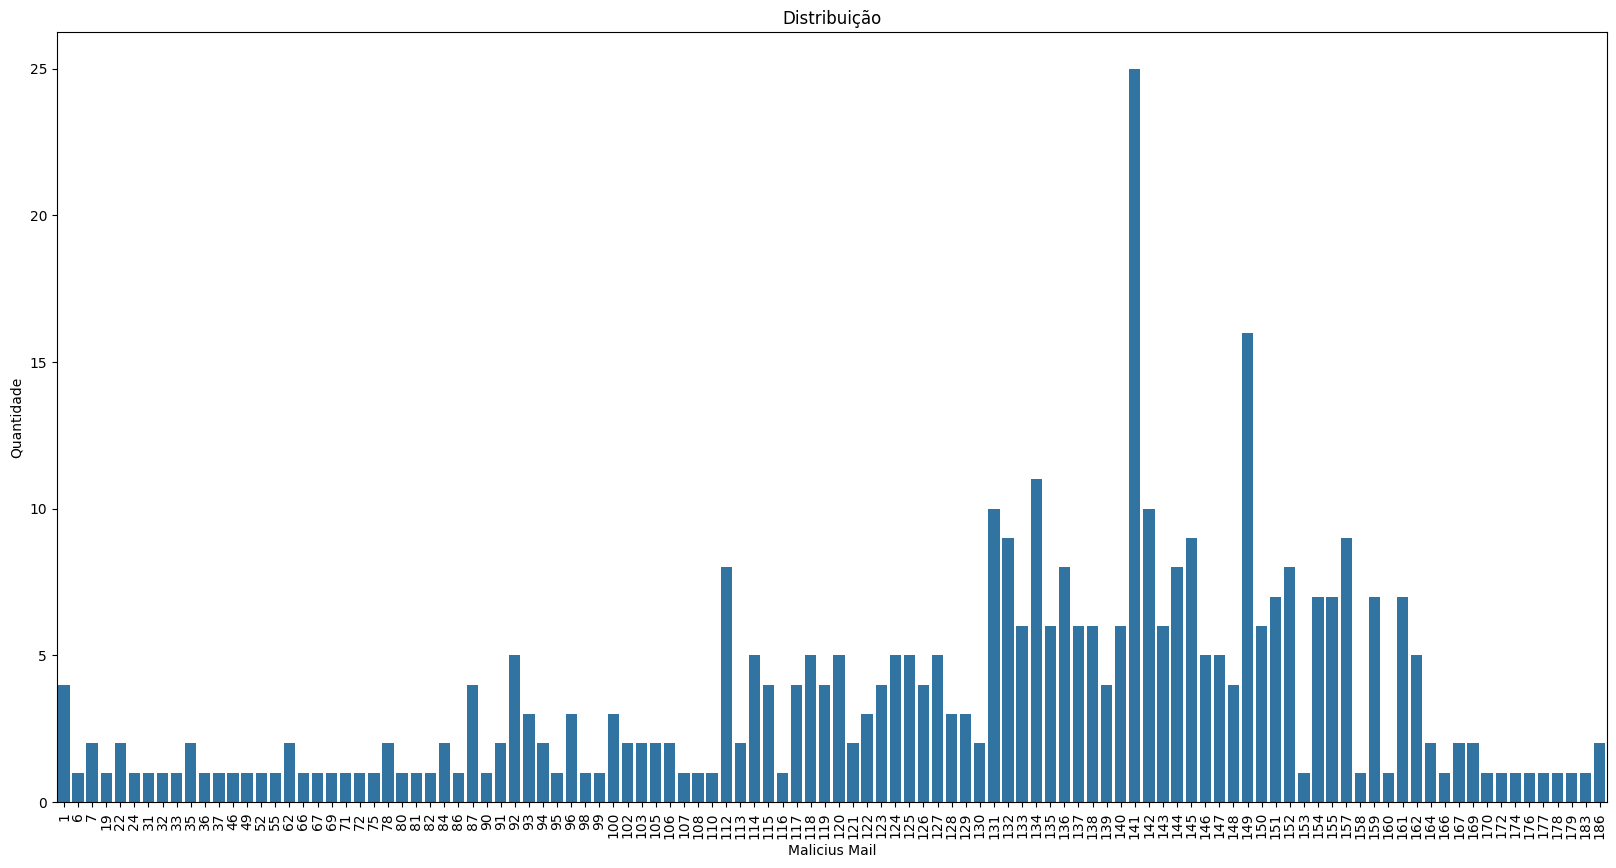

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Rank Malicious Mail', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Malicius Mail')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

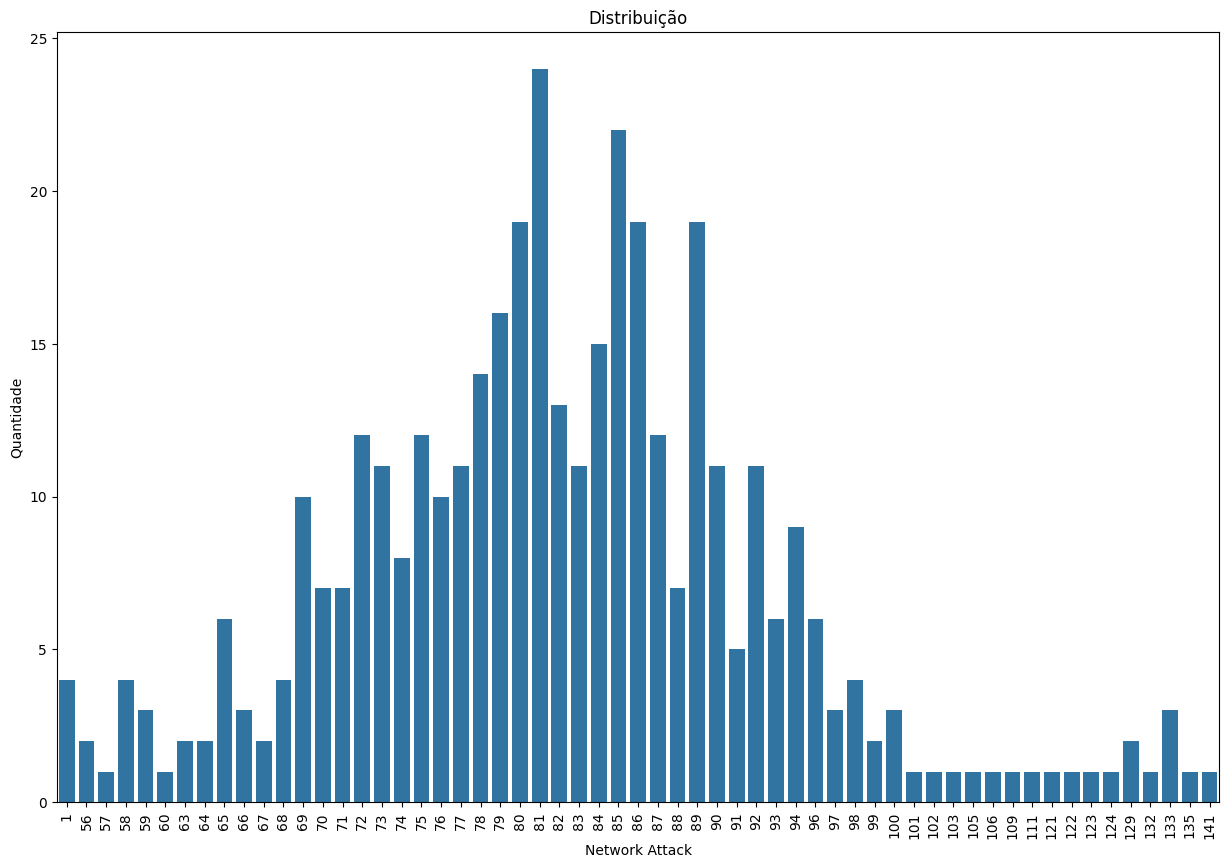

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Rank Network Attack', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Network Attack')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

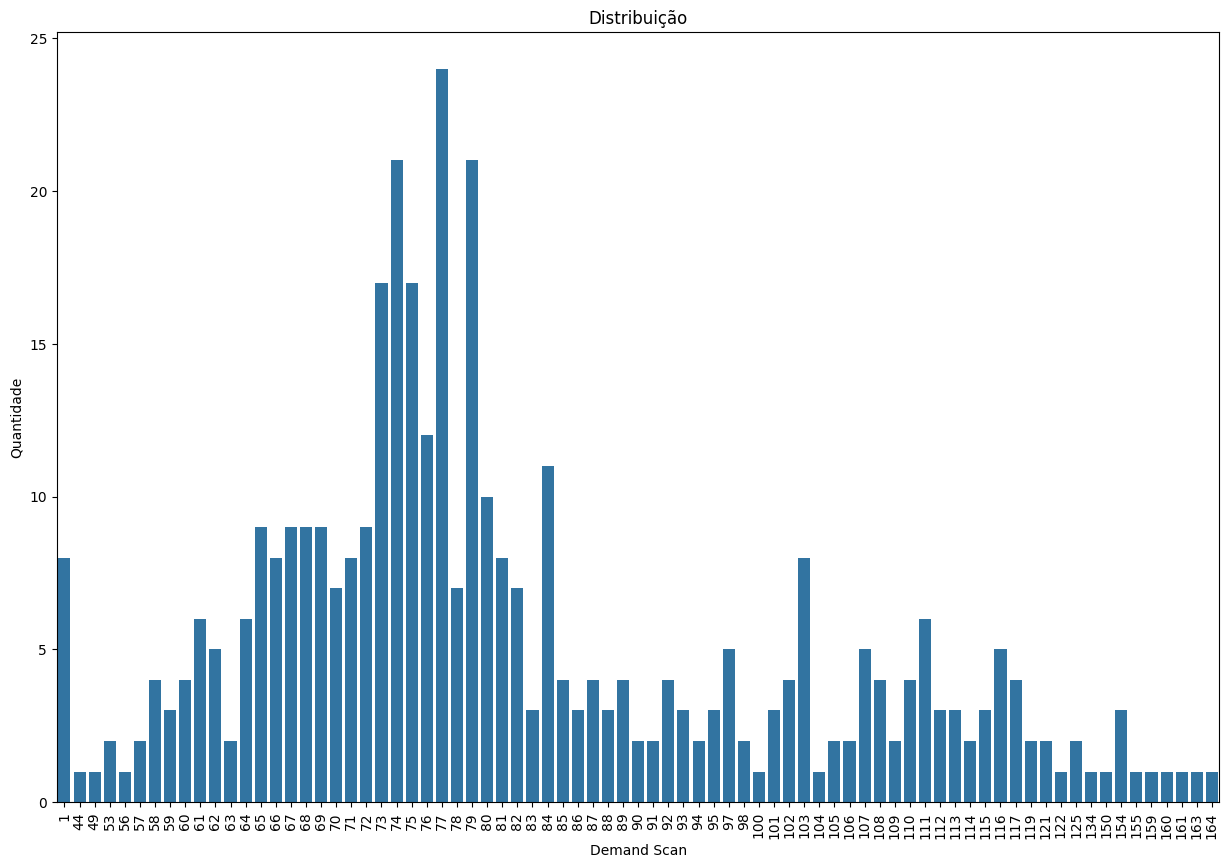

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Rank On Demand Scan', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Demand Scan')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

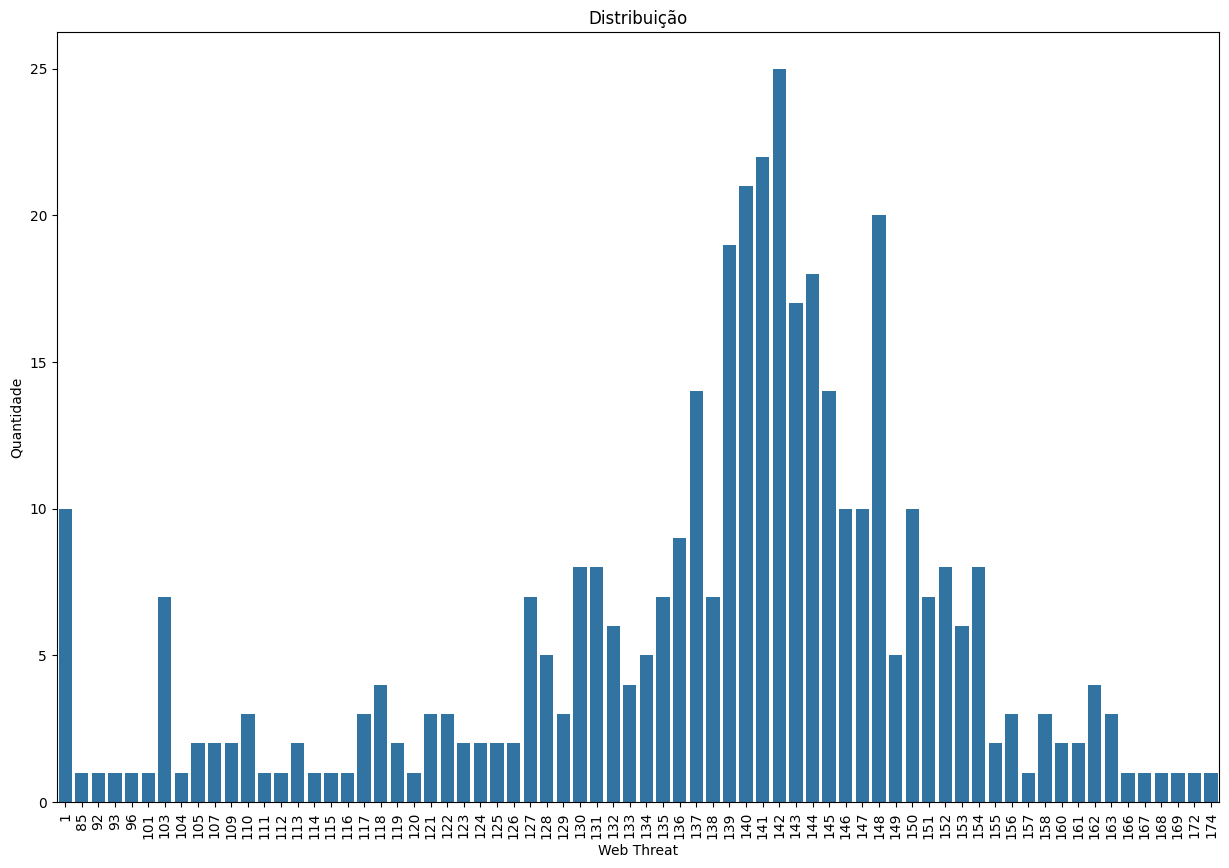

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Rank Web Threat', data=dados_brasil)
plt.title('Distribuição')
plt.xlabel('Web Threat')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Select only the numeric columns for correlation calculation.
correlation = dados_brasil.select_dtypes(include=['number']).corr()
print(correlation)

                          Spam  Ransomware  Local Infection   Exploit  \
Spam                  1.000000   -0.190136        -0.251550 -0.196487   
Ransomware           -0.190136    1.000000         0.783595  0.620658   
Local Infection      -0.251550    0.783595         1.000000  0.633544   
Exploit              -0.196487    0.620658         0.633544  1.000000   
Malicious Mail        0.053606    0.325907         0.408204  0.429493   
Network Attack       -0.191140    0.706914         0.754963  0.789990   
On Demand Scan       -0.210166    0.795936         0.957386  0.740626   
Web Threat           -0.212125    0.660240         0.688973  0.719081   
Rank Spam            -0.775441    0.194059         0.283878  0.179372   
Rank Ransomware      -0.015384   -0.477795        -0.242712 -0.211597   
Rank Local Infection  0.102948   -0.518605        -0.754589 -0.400889   
Rank Exploit          0.028660   -0.160577        -0.155565 -0.412245   
Rank Malicious Mail  -0.022248   -0.141617        -

In [ ]:
corr_target = correlation['Spam'].sort_values(ascending=False)
print(corr_target)

Spam                    1.000000
Rank Web Threat         0.108373
Rank Local Infection    0.102948
Rank On Demand Scan     0.070995
Malicious Mail          0.053606
Rank Exploit            0.028660
Rank Ransomware        -0.015384
Rank Malicious Mail    -0.022248
Rank Network Attack    -0.027458
Ransomware             -0.190136
Network Attack         -0.191140
Exploit                -0.196487
On Demand Scan         -0.210166
Web Threat             -0.212125
Local Infection        -0.251550
Rank Spam              -0.775441
Name: Spam, dtype: float64


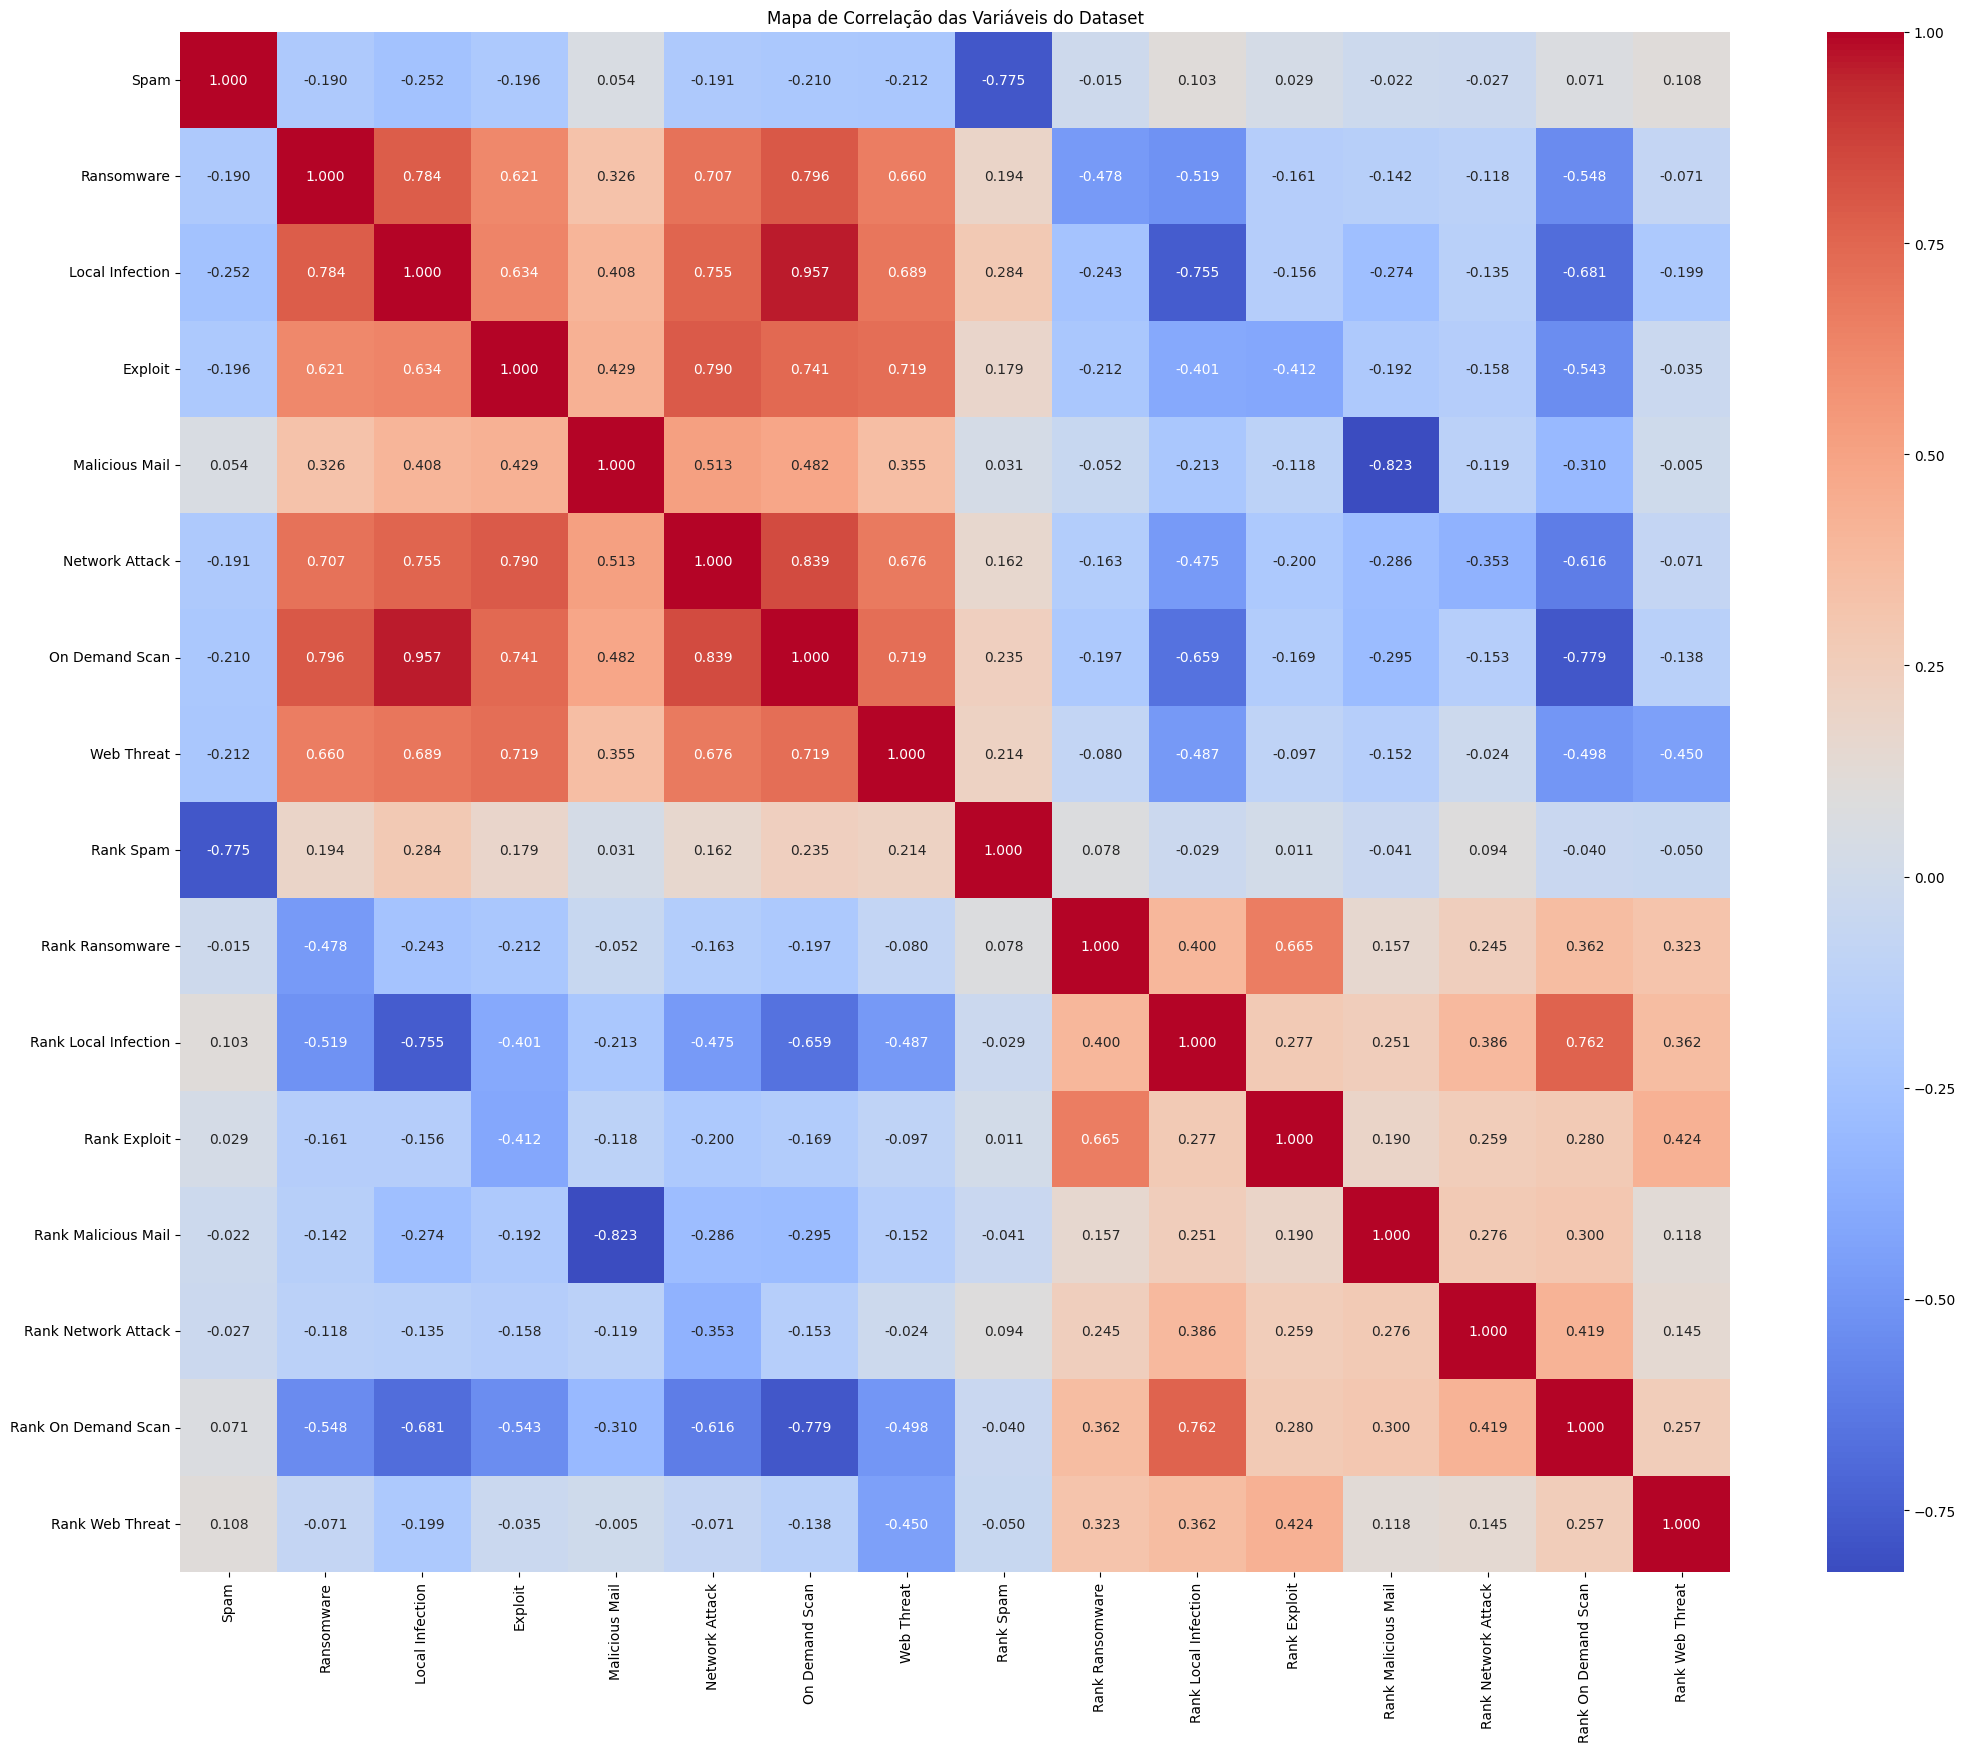

In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt='.3f')
plt.title("Mapa de Correlação das Variáveis do Dataset")
plt.show()